In [20]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import cv2
from PIL import Image
from keras.datasets import mnist
import matplotlib.pyplot as plt
from tensorflow.math import confusion_matrix
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split

tf.random.set_seed(42)


In [21]:
# we prepare the data
(xTrain, yTrain), (xTest, yTest) = cifar10.load_data()

In [22]:
# setting up the training and the test sets
xTrain, xValid, yTrain, yValid = train_test_split(xTrain, yTrain, test_size=0.2, random_state=2)

In [23]:
# need to check the shape of a sample
xTrain[0].shape

(32, 32, 3)

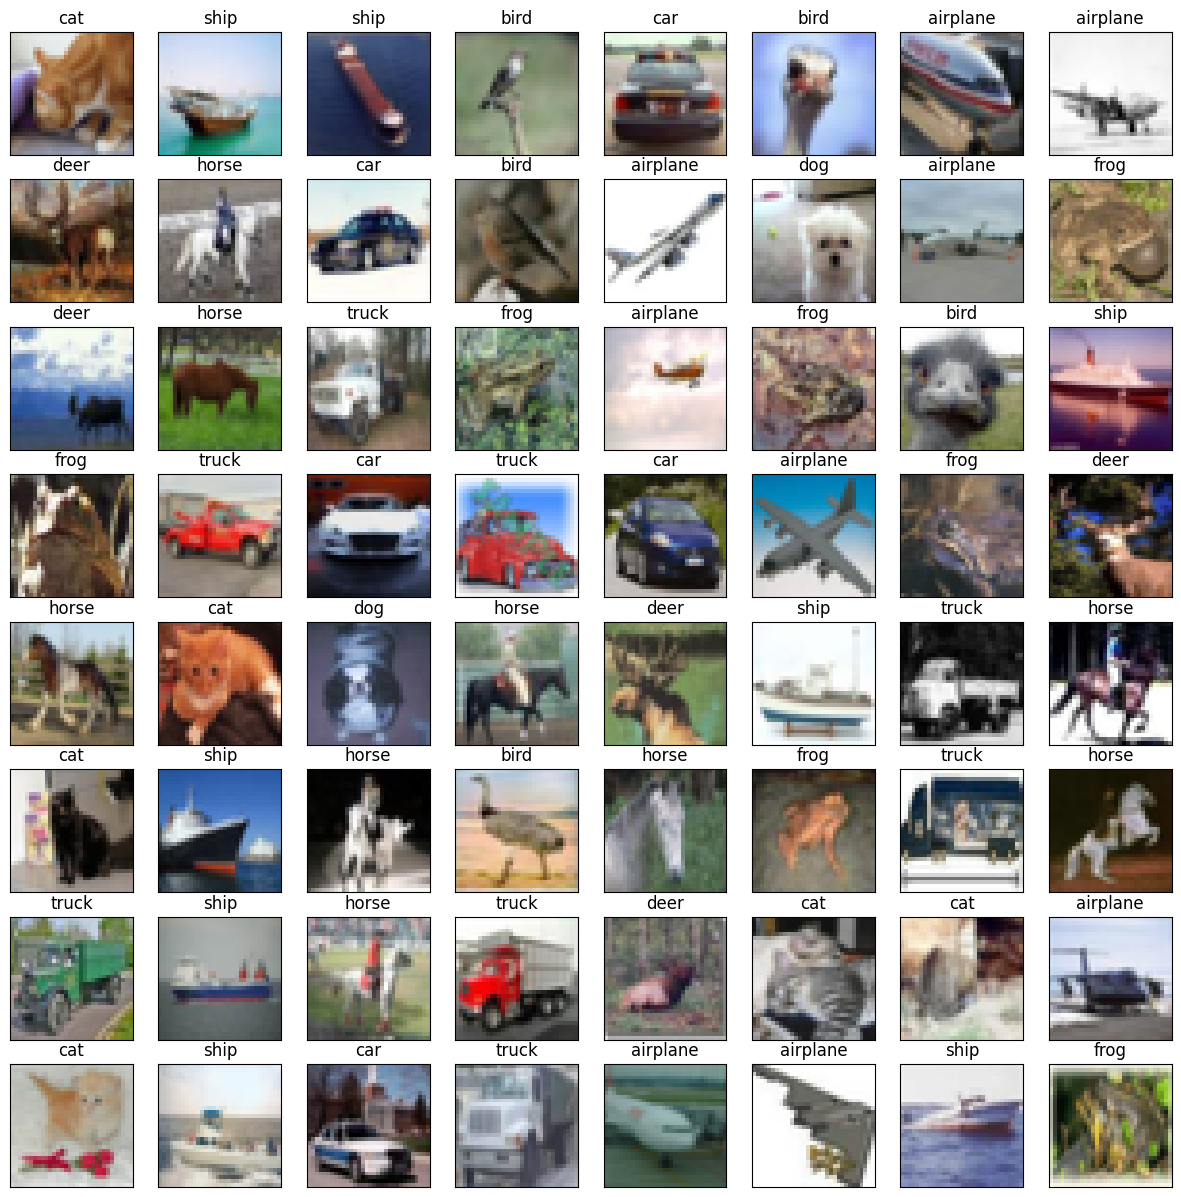

In [24]:
# CIFAR-10 classes
classNames = ['airplane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
               
# Create a new figure
plt.figure(figsize=(15,15))

# Loop over the first 25 images
for i in range(64):
    # Create a subplot for each image
    plt.subplot(8, 8, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    # Display the image
    plt.imshow(xTrain[i])

    # Set the label as the title
    plt.title(classNames[yTrain[i][0]], fontsize=12)

# Display the figure
plt.show()

In [46]:
# need to normalize the data to maximize the accuracy
xTrain = xTrain / 255
xTest = xTest / 255
xValid = xValid / 255


In [47]:
# create a new model for the training
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (32, 32, 3)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# compile the model
model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

# fit the model
model.fit(xTrain, yTrain, epochs=10, validation_data=(xValid, yValid))

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0985 - loss: 0.2123 - val_accuracy: 0.1029 - val_loss: 13.9613
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0985 - loss: 7.1631e-06 - val_accuracy: 0.1029 - val_loss: 15.1823
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0985 - loss: 1.4962e-06 - val_accuracy: 0.1029 - val_loss: 16.1684
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0985 - loss: 3.1270e-07 - val_accuracy: 0.1029 - val_loss: 16.9557
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0985 - loss: 0.0000e+00 - val_accuracy: 0.1029 - val_loss: 17.2909
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0985 - loss: 0.0000e+00 - val_accuracy: 0.1029 - val_loss: 17.6858
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0985 - loss: 0.0000e+00 - val_accuracy: 0.1029 - val_loss: 18.1124
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - acc

In [50]:
from tensorflow.keras import Sequential, models, layers, optimizers
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.applications.resnet50 import ResNet50

In [57]:
convolutionalBase = ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

In [58]:
convolutionalBase.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_22      │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 262, 262,  │          0 │ input_layer_22[0… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 128, 128,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 128, 128,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 128, 128,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 130, 130,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 64, 64,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 64, 64,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 64, 64,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 64, 64,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 64, 64,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 64, 64,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 64, 64,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 64, 64,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 64, 64,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [73]:
# we create the new model for higher accuracy 
modelTwo = models.Sequential()
modelTwo.add(layers.UpSampling2D((2,2)))
modelTwo.add(layers.UpSampling2D((2,2)))
modelTwo.add(layers.UpSampling2D((2,2)))
modelTwo.add(convolutionalBase)
modelTwo.add(layers.Flatten())
modelTwo.add(layers.BatchNormalization())
modelTwo.add(layers.Dense(128, activation = "relu"))
modelTwo.add(layers.Dropout(0.5))
modelTwo.add(layers.BatchNormalization())
modelTwo.add(layers.Dense(64, activation = "relu"))
modelTwo.add(layers.Dropout(0.5))
modelTwo.add(layers.BatchNormalization())
modelTwo.add(layers.Dense(10, activation = "softmax"))

In [74]:
# same as previous model, we need to compile the model
modelTwo.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.RMSprop(learning_rate=2e-5),
    metrics = ["accuracy"]
)

In [ ]:
# we fit the model to the new model
modelTwo.fit(xTrain, yTrain, epochs = 10, validation_split=0.1, validation_data=(xValid, yValid))